In [967]:
# Importing the packages
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import random
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,RocCurveDisplay,ConfusionMatrixDisplay

In [968]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [969]:
# Importing the dataset
df = pd.read_csv('dataset_30.csv')
df.drop(['index'], axis=1, inplace=True)
#df.head()

In [970]:
# if your dataset contains missing value, check which column has missing values
#df.isnull().sum()

In [971]:
#df.dropna(inplace=True)

In [972]:
from sklearn import preprocessing


col = df.columns[:]

lab_en= preprocessing.LabelEncoder()

for c in col:
    df[c]= lab_en.fit_transform(df[c])

#df.head(50)

In [973]:
##print(df.corr()['Result'].sort_values())
## correlation values of features with target label
corr_col = abs(df.corr()['Result']).sort_values(ascending=False)
corr_col = corr_col.rename_axis('Col').reset_index(name='Correlation')
corr_col

,Col,Correlation
0,Result,1.000000
1,SSLfinal_State,0.714741
2,URL_of_Anchor,0.692935
3,Prefix_Suffix,0.348606
4,web_traffic,0.346103
5,having_Sub_Domain,0.298323
6,Request_URL,0.253372
7,Links_in_tags,0.248229
8,Domain_registeration_length,0.225789
9,SFH,0.221419


In [974]:
def correlation (corr_col, threshold):
	corr_feature = set()
	for index, row in corr_col.iterrows():
		if row['Correlation'] < threshold or np.isnan(row['Correlation']):
			corr_feature.add(row['Col'])
	return corr_feature

In [975]:
corr_feature = correlation(corr_col,.02)
len(set(corr_feature))


5

In [976]:
corr_feature


{'Favicon', 'Iframe', 'RightClick', 'Submitting_to_email', 'popUpWidnow'}

In [977]:
df.drop(corr_feature, axis=1, inplace=True)

In [978]:
# # Remove features having correlation coeff. between +/- 0.03
# df.drop(['Favicon','Iframe','Redirect',
#                 'popUpWidnow','RightClick','Submitting_to_email'], axis=1, inplace=True)


In [979]:
len(df.columns)


26

In [980]:
#df.head()

In [981]:
a=len(df[df.Result==0])
b=len(df[df.Result==1])


In [982]:
print("Count of Legitimate Websites = ", a)
print("Count of Phishy Websites = ", b)

Count of Legitimate Websites =  4898
Count of Phishy Websites =  6157


In [983]:
# df.corr()

In [984]:
# #Using Pearson Correlation
# plt.figure(figsize=(30,30))
# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
# plt.show()

In [985]:
# # with the following function we can select highly correlated features
# # it will remove the first feature that is correlated with anything other feature

# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
#     return col_corr

In [986]:
# corr_features = correlation(df, 0.8)
# len(set(corr_features))

In [987]:
# corr_features

In [988]:
#df.head()

In [989]:
#from sklearn import preprocessing


# col =df[df.columns[:]]

# lab_en= preprocessing.LabelEncoder()

# for c in col:
#     df[c]= lab_en.fit_transform(df[c])

# df.head()

In [990]:
X = df.drop(['Result'], axis=1, inplace=False)
#X.head()
#same work
##inplace true modifies the og data & does not return anything
##inplace false does not modify og data but returns something whoch we store in a var
# X= df.drop(columns='Result')
# X.head()

In [991]:
#df.head()

In [992]:
y = df['Result']
y = pd.DataFrame(y)
y.head()

,Result
0,0
1,0
2,0
3,0
4,1


In [993]:
# separate dataset into train and test
from cProfile import label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7738, 25), (3317, 25), (7738, 1), (3317, 1))

In [994]:
#X_test.head()

In [995]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 7738 samples.
Testing set has 3317 samples.


In [996]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# defining parameter range
param_grid = {'penalty' : ['l2'],
            'C' : [0.1, 1, 10, 20, 30],
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter' : [2500, 5000]}

grid_logr = GridSearchCV(LogisticRegression(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_logr.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_logr.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_logr.best_estimator_)
print(grid_logr.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'C': 1, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=1, max_iter=2500)
0.9286656237151139


In [997]:
logr_model = grid_logr.best_estimator_

# Performing training
#logr_model = logr.fit(X_train, y_train.values.ravel())

In [998]:
logr_predict  =  logr_model.predict(X_test)

In [999]:
# from sklearn.metrics import confusion_matrix,accuracy_score
# cm = confusion_matrix(y_test, dct_pred)
# ac = accuracy_score(y_test, dct_pred)

In [1000]:
print ("Accuracy of logr classifier : ", accuracy_score(y_test, logr_predict)*100)

Accuracy of logr classifier :  93.0660235152246


In [1001]:
print(classification_report(y_test, logr_predict))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1444
           1       0.93      0.95      0.94      1873

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



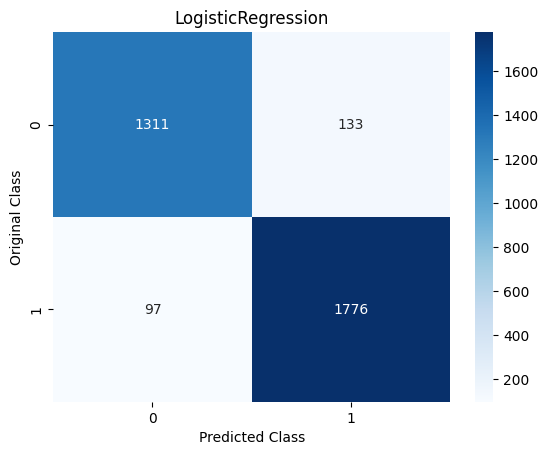

In [1002]:
sns.heatmap(confusion_matrix(y_test, logr_predict), annot=True, fmt='g', cmap='Blues')
plt.title("LogisticRegression")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [1003]:
# from sklearn.neighbors import KNeighborsClassifier

# #training_accuracy=[]
# test_accuracy=[]

# neighbors=range(1,10)
# ##values.ravel() converts vector y to flattened array
# for i in neighbors:
#     knn=KNeighborsClassifier(n_neighbors=i)
#     knn_model = knn.fit(X_train,y_train.values.ravel())
#     #training_accuracy.append(knn.score(X_train,y_train.values.ravel()))
#     test_accuracy.append(knn_model.score(X_test,y_test.values.ravel()))

In [1004]:
# plt.plot(neighbors,test_accuracy,label="test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("number of neighbors")
# plt.legend()
# plt.show()

In [1005]:
from sklearn.neighbors import KNeighborsClassifier

# defining parameter range
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_knn.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_knn.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_knn.best_estimator_)
print(grid_knn.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)
0.9590302221954798


In [1006]:
knn_model = grid_knn.best_estimator_
#knn_model = knn.fit(X_train,y_train.values.ravel())

In [1007]:
#print ("Accuracy of knn classifier: ", max(test_accuracy)*100)
knn_predict = knn_model.predict(X_test)

In [1008]:
print('The accuracy of knn Classifier is: ', 100.0 * accuracy_score(y_test, knn_predict))

The accuracy of knn Classifier is:  95.83961410913476


In [1009]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1444
           1       0.95      0.97      0.96      1873

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



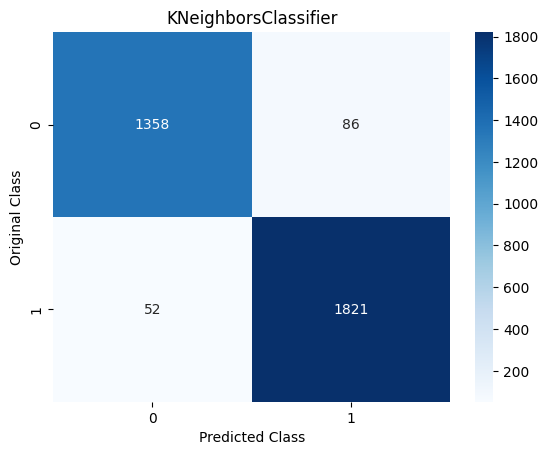

In [1010]:
sns.heatmap(confusion_matrix(y_test, knn_predict), annot=True, fmt='g', cmap='Blues')
plt.title("KNeighborsClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [1011]:
# # here is the change
# knn_y_pred_proba = knn.predict_proba(X_test)
# knn_y_pred_proba_positive = knn_y_pred_proba[:, 1] 

# RocCurveDisplay.from_predictions(y_test,knn_y_pred_proba_positive)

# fig, ax = plt.subplots()
# RocCurveDisplay.from_estimator(
#    logreg, X_test, y_test, ax = ax)

# logreg_y_decision = logreg.decision_function(X_test)
# metrics.RocCurveDisplay.from_predictions(y_test,logreg_y_decision,ax=ax,name="logreg predictions")

In [1012]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
			'gamma': [1, 0.1, 0.01],
			'kernel': ['linear','poly', 'rbf', 'sigmoid']}

grid_svc = GridSearchCV(SVC(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_svc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_svc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)
print(grid_svc.best_score_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
0.9639441285504645


In [1013]:
svc_model = grid_svc.best_estimator_
#svc_model = svc.fit(X_train,y_train.values.ravel())

In [1014]:
svc_predict = svc_model.predict(X_test)

In [1015]:
print('The accuracy of svc Classifier is: ', 100.0 * accuracy_score(y_test, svc_predict))

The accuracy of svc Classifier is:  96.47271630991861


In [1016]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1444
           1       0.97      0.97      0.97      1873

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



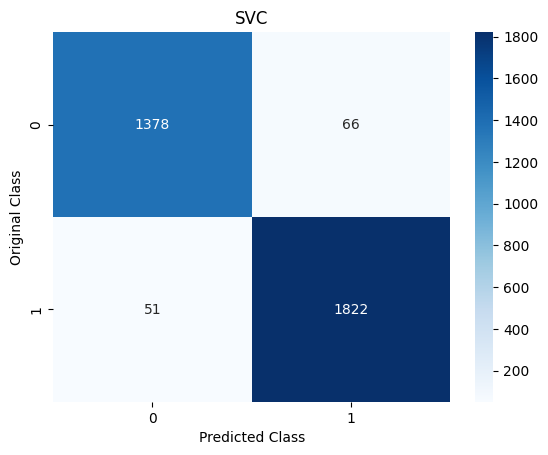

In [1017]:
sns.heatmap(confusion_matrix(y_test, svc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("SVC")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [1018]:
from sklearn.svm import NuSVC

# defining parameter range
param_grid = {'nu': [0.1, 0.5],
			'gamma': [1, 0.1, 0.01],
			'kernel': ['linear','poly', 'rbf', 'sigmoid']}

grid_nusvc = GridSearchCV(NuSVC(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_nusvc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_nusvc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_nusvc.best_estimator_)
print(grid_nusvc.best_score_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'gamma': 0.1, 'kernel': 'rbf', 'nu': 0.1}
NuSVC(gamma=0.1, nu=0.1)
0.9627811707131182


In [1019]:
nusvc_model = grid_nusvc.best_estimator_
#nusvc_model = nusvc.fit(X_train, y_train.values.ravel())


In [1020]:
nusvc_predict = nusvc_model.predict(X_test)

In [1021]:
print('The accuracy of nusvc Classifier is: ', 100.0 * accuracy_score(y_test, nusvc_predict))

The accuracy of nusvc Classifier is:  96.47271630991861


In [1022]:
print(classification_report(y_test, nusvc_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1444
           1       0.97      0.97      0.97      1873

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



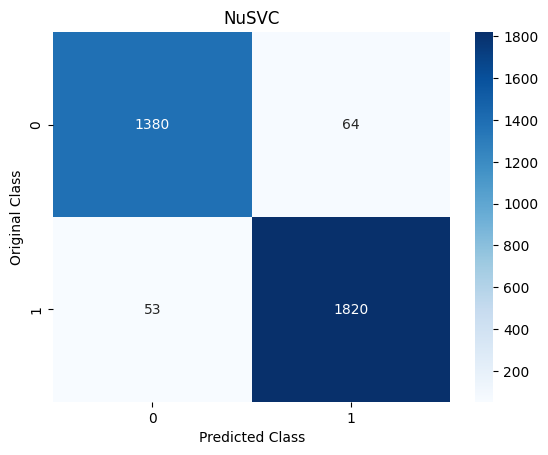

In [1023]:
sns.heatmap(confusion_matrix(y_test, nusvc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("NuSVC")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [1024]:
from sklearn.svm import LinearSVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 20, 30],
			'penalty': ['l1','l2'],
			'loss': ['squared_hinge'],
			'dual': [False],
			'tol': [.1,.01,.001]}

grid_lsvc = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_lsvc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_lsvc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_lsvc.best_estimator_)
print(grid_lsvc.best_score_)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'C': 10, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2', 'tol': 0.001}
LinearSVC(C=10, dual=False, tol=0.001)
0.9285367590280493


In [1025]:
lsvc_model = grid_lsvc.best_estimator_
#lsvc_model = lsvc.fit(X_train, y_train.values.ravel())

In [1026]:
lsvc_predict = lsvc_model.predict(X_test)

In [1027]:
print('The accuracy of lsvc Classifier is: ', 100.0 * accuracy_score(y_test, lsvc_predict))

The accuracy of lsvc Classifier is:  92.94543261983719


In [1028]:
print(classification_report(y_test, lsvc_predict))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1444
           1       0.93      0.95      0.94      1873

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



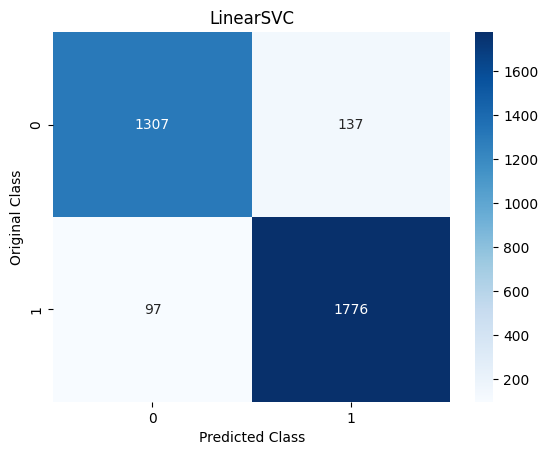

In [1029]:
sns.heatmap(confusion_matrix(y_test, lsvc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("LinearSVC")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [1030]:
from sklearn.ensemble import AdaBoostClassifier

# defining parameter range
param_grid = {'n_estimators': [40,50,100,200,300]}

grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_ada.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_ada.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'n_estimators': 100}
AdaBoostClassifier(n_estimators=100)
0.9369356946826184


In [1031]:
ada_model = grid_ada.best_estimator_
#ada_model = ada.fit(X_train,y_train.values.ravel())

In [1032]:
ada_predict = ada_model.predict(X_test)

In [1033]:
print('The accuracy of Ada Boost Classifier is: ', 100.0 * accuracy_score(ada_predict,y_test))

The accuracy of Ada Boost Classifier is:  93.88001205908954


In [1034]:
print(classification_report(y_test, ada_predict))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1444
           1       0.93      0.96      0.95      1873

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



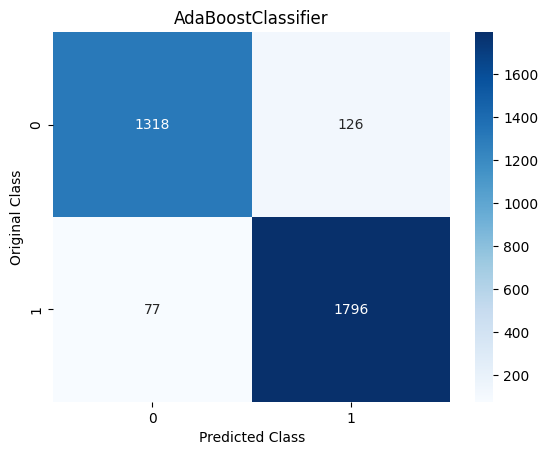

In [1035]:
sns.heatmap(confusion_matrix(y_test, ada_predict), annot=True, fmt='g', cmap='Blues')
plt.title("AdaBoostClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [1036]:
from xgboost import XGBClassifier


# defining parameter range
param_grid = {
    "gamma": [.01, .1, .5],
    "n_estimators": [50,100,150,200,250]
}

grid_xgb = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_xgb.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_xgb.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_xgb.best_estimator_)
print(grid_xgb.best_score_)


Fitting 10 folds for each of 15 candidates, totalling 150 fits
{'gamma': 0.1, 'n_estimators': 250}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
0.9706616391053349


In [1037]:
xgb_model = grid_xgb.best_estimator_
#xgb_model = xgb.fit(X_train,y_train)

In [1038]:
xgb_predict=xgb_model.predict(X_test)

In [1039]:
print('The accuracy of XGBoost Classifier is: ' , 100.0 * accuracy_score(xgb_predict,y_test))

The accuracy of XGBoost Classifier is:  97.34700030147724


In [1040]:
print(classification_report(y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1444
           1       0.97      0.98      0.98      1873

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



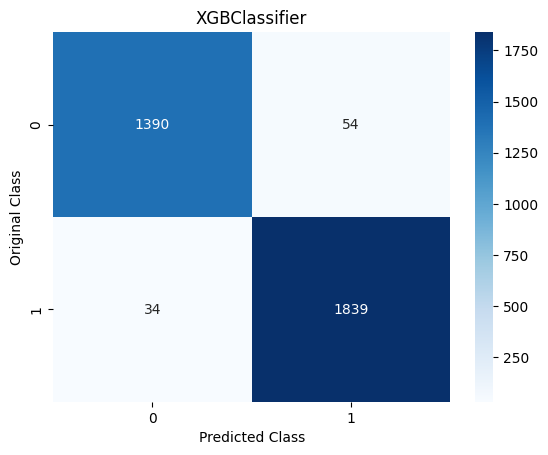

In [1041]:
sns.heatmap(confusion_matrix(y_test, xgb_predict), annot=True, fmt='g', cmap='Blues')
plt.title("XGBClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [1042]:
from sklearn.ensemble import GradientBoostingClassifier

# defining parameter range
param_grid = {
    "learning_rate": [.1,.5,1],
    "n_estimators": [50,100,150,200,250]
}

grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_gbc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_gbc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
{'learning_rate': 1, 'n_estimators': 150}
GradientBoostingClassifier(learning_rate=1, n_estimators=150)
0.9671725984536238


In [1043]:
gbc_model = grid_gbc.best_estimator_
#gbc_model = gbc.fit(X_train,y_train.values.ravel())

#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#    max_depth=1, random_state=0).fit(X_train, y_train)
#clf.score(X_test, y_test)

In [1044]:
gbc_predict = gbc_model.predict(X_test)

In [1045]:
print('The accuracy of GradientBoost Classifier is: ' , 100.0 * accuracy_score(gbc_predict,y_test))

The accuracy of GradientBoost Classifier is:  96.593307205306


In [1046]:
print(classification_report(y_test, gbc_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1444
           1       0.97      0.97      0.97      1873

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



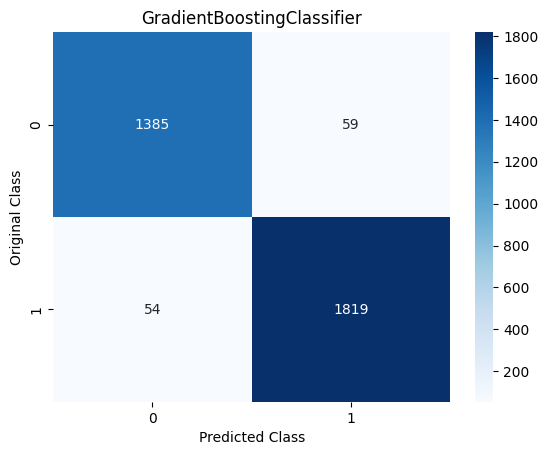

In [1047]:
sns.heatmap(confusion_matrix(y_test, gbc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("GradientBoostingClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [1048]:
# gbc_model.get_params().keys()

In [1049]:
# import inspect
# import sklearn
# import xgboost

# models = [xgboost.XGBClassifier]
# for m in models:
#     hyperparams = inspect.signature(m.__init__)
#     print(hyperparams)
# #or
# xgb_model.get_params().keys()


In [1050]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# defining parameter range
param_grid = {
    "base_estimator": [DecisionTreeClassifier()],
    "n_estimators": [50,100,150,200,250]
}

grid_bag = GridSearchCV(BaggingClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_bag.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_bag.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_bag.best_estimator_)
print(grid_bag.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'base_estimator': DecisionTreeClassifier(), 'n_estimators': 200}
BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200)
0.9652341125384838


In [1051]:
bag_model = grid_bag.best_estimator_
#bag_model = bag.fit(X_train, y_train.values.ravel())


In [1052]:
bag_predict = bag_model.predict(X_test)

In [1053]:
print('The accuracy of Bagging Classifier is: ' , 100.0 * accuracy_score(y_test, bag_predict))

The accuracy of Bagging Classifier is:  97.10581851070245


In [1054]:
print(classification_report(y_test, bag_predict))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1444
           1       0.97      0.98      0.97      1873

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



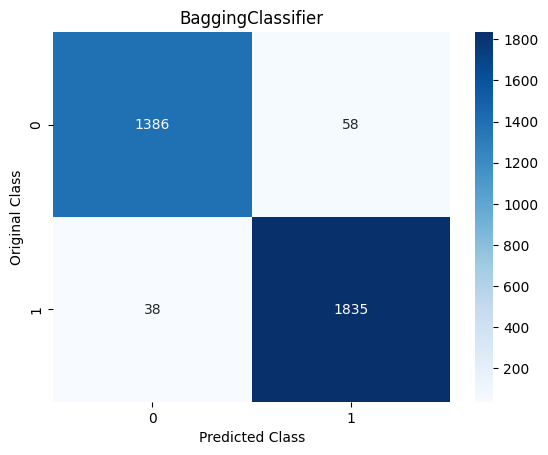

In [1055]:
sns.heatmap(confusion_matrix(y_test, bag_predict), annot=True, fmt='g', cmap='Blues')
plt.title("BaggingClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [1056]:
from sklearn.ensemble import RandomForestClassifier

# defining parameter range
param_grid = {
    "n_estimators": [50,100,150,200,250]
}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_rfc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_rfc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_rfc.best_estimator_)
print(grid_rfc.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'n_estimators': 250}
RandomForestClassifier(n_estimators=250)
0.9685939542237867


In [1057]:
rfc_model = grid_rfc.best_estimator_
#rfc_model = rfc.fit(X_train,y_train.values.ravel())

In [1058]:
rfc_predict = rfc_model.predict(X_test)

In [1059]:
print('The accuracy of RandomForest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,y_test))

The accuracy of RandomForest Classifier is:  97.34700030147724


In [1060]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1444
           1       0.97      0.98      0.98      1873

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



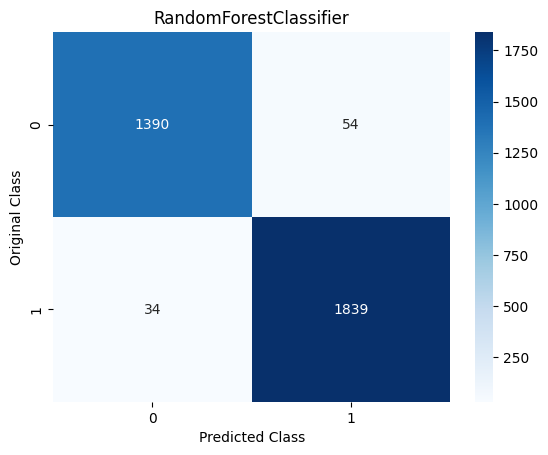

In [1061]:
sns.heatmap(confusion_matrix(y_test, rfc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("RandomForestClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

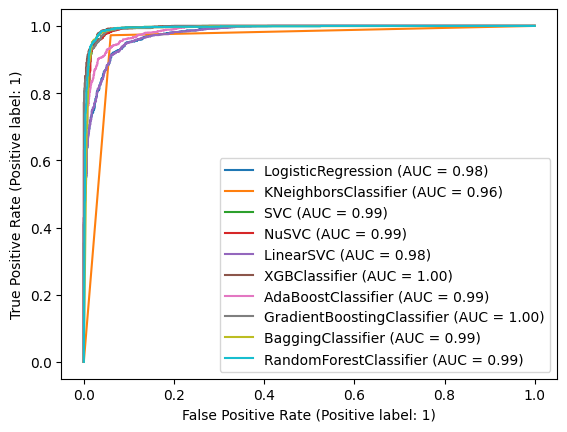

In [1062]:
estimators = [logr_model,knn_model,svc_model,nusvc_model,lsvc_model,xgb_model,ada_model,gbc_model,bag_model,rfc_model]

for estimator in estimators:
    RocCurveDisplay.from_estimator(estimator,X_test,y_test,ax=plt.gca())


In [1063]:
import tensorflow as tf
#from tensorflow.keras.datasets import imdb
from keras.layers import Embedding, Dense, LSTM, BatchNormalization
from keras.losses import BinaryCrossentropy
from keras.models import Sequential
from keras.optimizers import Adam
#from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model configuration
additional_metrics = ['accuracy']
batch_size = 32
#embedding_output_dims = (X_train.shape[1])
loss_function = BinaryCrossentropy()
#max_sequence_length = (X_train.shape[1])
#num_distinct_words = (X_train.shape[1])
number_of_epochs = 100
optimizer = Adam()
validation_split = 0.20
verbosity_mode = 1

# reshape from [samples, features] into [samples, timesteps, features]
timesteps = 1
X_train_reshape = X_train.values.ravel().reshape(X_train.shape[0],timesteps, X_train.shape[1])
X_test_reshape = X_test.values.ravel().reshape(X_test.shape[0],timesteps, X_test.shape[1])

# Disable eager execution
#tf.compat.v1.disable_eager_execution()

# Load dataset
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)
# print(x_train.shape)
# print(x_test.shape)

# Pad all sequences
# padded_inputs = pad_sequences(X_train, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>
# padded_inputs_test = pad_sequences(X_test, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>

# Define the Keras model
def build_model_lstm():
    model = Sequential()
    #model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
    model.add(LSTM(100, input_shape = (timesteps,X_train_reshape.shape[2])))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
    return model

#from keras.wrappers.scikit_learn import KerasClassifier
lstm_model = build_model_lstm()
# Give a summary
lstm_model.summary()

# Train the model
history = lstm_model.fit(X_train_reshape, y_train.values.ravel(), batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

# Test the model after training
#lstm_predict = lstm_model.predict(X_test_reshape)
test_results = lstm_model.evaluate(X_test_reshape, y_test.values.ravel(), verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100)               50400     
                                                                 
 batch_normalization_9 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_36 (Dense)            (None, 50)                5050      
                                                                 
 dense_37 (Dense)            (None, 25)                1275      
                                                                 
 dense_38 (Dense)            (None, 10)                260       
                                                                 
 dense_39 (Dense)            (None, 1)                 11        
                                                      

In [1064]:
lstm_predict_proba = lstm_model.predict(X_test_reshape, batch_size=32)
lstm_predict_class = (lstm_predict_proba > 0.5).astype("int32")
print(classification_report(y_test, lstm_predict_class))

104/104 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1444
           1       0.96      0.98      0.97      1873

    accuracy                           0.97      3317
   macro avg       0.97      0.96      0.96      3317
weighted avg       0.97      0.97      0.97      3317



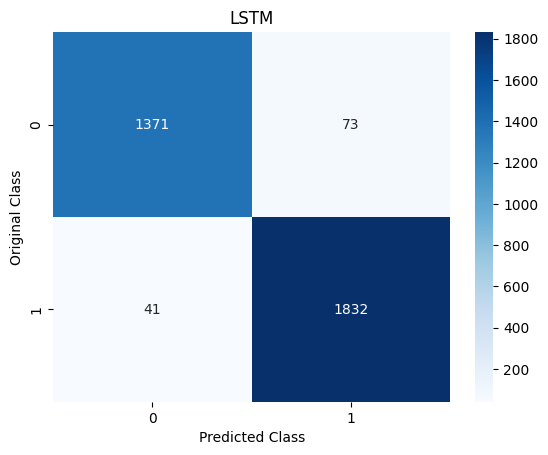

In [1065]:
sns.heatmap(confusion_matrix(y_test, lstm_predict_class), annot=True, fmt='g', cmap='Blues')
plt.title("LSTM")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


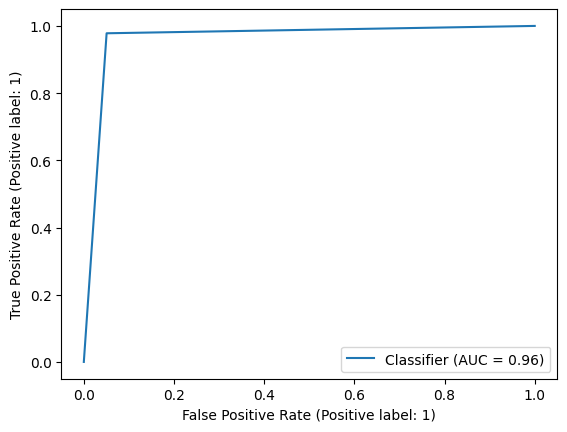

In [1066]:
RocCurveDisplay.from_predictions(y_test,lstm_predict_class)
plt.show()

In [1067]:
# print("Trade off between true positive rate and false positive rate")
# from sklearn.metrics import roc_curve
# fpr, tpr, _ = roc_curve(y_test, lstm_predict_class)
# plt.plot(fpr, tpr)
# plt.title('ROC curve')
# plt.xlabel('false positive rate')
# plt.ylabel('true positive rate')
# plt.xlim(0,)
# plt.ylim(0,)
# plt.show()

In [1068]:
# from sklearn.metrics import roc_curve
# fpr, tpr, thresh = roc_curve(y_test, lstm_predict_class)

In [1069]:
# # plot roc curves
# plt.plot(fpr, tpr, linestyle='--',color='orange', label='LSTM')

# # title
# plt.title('ROC curve')
# # x label
# plt.xlabel('False Positive Rate')
# # y label
# plt.ylabel('True Positive rate')

# plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
# plt.show()

In [1070]:
# from keras.layers import Flatten
# model = Sequential([
#     Flatten(input_shape=(len(X_test.columns),)),
#     Dense(16, activation=tf.nn.relu),
# 	Dense(16, activation=tf.nn.relu),
#     Dense(1, activation=tf.nn.sigmoid),
# ])

# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=50, batch_size=1)

# test_loss, test_acc = model.evaluate(X_test, y_test)
# print('Test accuracy:', test_acc)

In [1071]:
# model_pred = model.predict(X_test, batch_size=64)
# model_pred = (model_pred > 0.5).astype(int).reshape(-1,)
# print(classification_report(y_test, model_pred))

In [1072]:
# sns.heatmap(confusion_matrix(y_test, model_pred), annot=True, fmt='g', cmap='Blues')
# plt.title("Nural network")
# plt.xlabel('Predicted Class')
# plt.ylabel('Original Class')
# plt.show()


In [1073]:
# tensorflow\python\keras\engine\sequential.py:455: UserWarning: model.predict_classes() is deprecated and will be removed after 2021-01-01. Please use instead:* np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).* (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).